In [240]:
#1. Dataset:
#Use appropriate Python libraries to load the dataset in a Dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#---Univariate Data Visualisation:---
#read the cleaned CSV file
df = pd.read_csv("BikeSharing Dataset.csv")

In [242]:
#display the first few rows of the dataframe
print ("DataFrame head:")
print (df.head())

DataFrame head:
      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  1/01/2011       1   0     1        0        6           0           2   
1  2/01/2011       1   0     1        0        0           0           2   
2  3/01/2011       1   0     1        0        1           1           1   
3  4/01/2011       1   0     1        0        2           1           1   
4  5/01/2011       1   0     1        0        3           1           1   

       temp     atemp        hum  windspeed  casual  registered  count  
0  0.344167  0.363625  80.120000   0.160446     331         654    985  
1  0.363478  0.353739   0.696087   0.248539     131         670    801  
2  0.196364  0.189405   0.437273   0.248309     120        1229   1349  
3  0.200000  0.212122   0.590435   0.160296     108        1454   1562  
4  0.226957  0.229270   0.436957   0.186900      82        1518   1600  


In [244]:
#display summary stats of the dataframe
print ("\nDataFrame describe:")
print (df.describe())


DataFrame describe:
           season          yr        mnth     holiday     weekday  workingday  \
count  734.000000  734.000000  734.000000  734.000000  734.000000  734.000000   
mean     2.497275    0.501362    6.521798    0.028610    2.990463    0.683924   
std      1.111453    0.500339    3.457233    0.166822    2.005087    0.465260   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  734.000000  731.000000  732.000000  734.000000  732.000000   
mean     1.395095    0.637989    0.474873    0.941225    0.190555   
std      0.544628    2.245183    0.162644 

In [246]:
#display basic information about the dataframe
print ("\nDataFrame information:")
print (df.info())


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      734 non-null    object 
 1   season      734 non-null    int64  
 2   yr          734 non-null    int64  
 3   mnth        734 non-null    int64  
 4   holiday     734 non-null    int64  
 5   weekday     734 non-null    int64  
 6   workingday  734 non-null    int64  
 7   weathersit  734 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       732 non-null    float64
 10  hum         734 non-null    float64
 11  windspeed   732 non-null    float64
 12  casual      734 non-null    int64  
 13  registered  734 non-null    int64  
 14  count       734 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 86.1+ KB
None


In [248]:
print (df.shape)

(734, 15)


In [250]:
#2. Data Pre-Processing:
#a. Handling Missing Values:
#identify columns with missing values
missing_values = df.isnull().sum()
print (missing_values)

print (df.columns)

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          3
atemp         2
hum           0
windspeed     2
casual        0
registered    0
count         0
dtype: int64
Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')


In [252]:
columns_to_replace = ['temp', 'atemp', 'windspeed']

for column_name in columns_to_replace:
    df[column_name].fillna(df[column_name].mean())
    
print(df.isnull().sum())


dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          3
atemp         2
hum           0
windspeed     2
casual        0
registered    0
count         0
dtype: int64


In [254]:
#find duplicates based on all columns
duplicates= df.duplicated(keep=False)
print (duplicates)

#number of duplicates
num_duplicates = duplicates.sum()
print (f"\nNumber of duplicates: {num_duplicates}")

0      False
1      False
2      False
3      False
4      False
       ...  
729    False
730    False
731     True
732     True
733     True
Length: 734, dtype: bool

Number of duplicates: 6


In [256]:
df = df.drop_duplicates(keep='first')

print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 731


In [258]:
#identify outliers in numerical columns using Z-score
from scipy.stats import zscore
#select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
#calculate zscores for numerical columns
z_scores = zscore(df[numerical_columns])
outliers = (np.abs(z_scores)>3).any(axis=1)
print(df[outliers])

         dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0     1/01/2011       1   0     1        0        6           0           2   
16   17/01/2011       1   0     1        1        1           0           2   
51   21/02/2011       1   0     2        1        1           0           2   
91    2/04/2011       2   0     4        0        6           0           2   
104  15/04/2011       2   0     4        1        5           0           1   
132  13/05/2011       2   0     5        0        5           1           2   
149  30/05/2011       2   0     5        1        1           0           1   
184   4/07/2011       3   0     7        1        1           0           2   
247   5/09/2011       3   0     9        1        1           0           2   
282  10/10/2011       4   0    10        1        1           0           1   
314  11/11/2011       4   0    11        1        5           0           1   
327  24/11/2011       4   0    11        1        4 

In [260]:
num_outliers = outliers.sum()
print (f"Number of outliers: {num_outliers}")

Number of outliers: 31


In [262]:
numerical_columns = df.select_dtypes(include=[float, int]).columns  # Select numerical columns

for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    
    print(f"\nColumn: {col}")
    print(f"Mean: {mean}, Median: {median}")
    
    if mean > median:
        print("The distribution is positively skewed.")
    elif mean < median:
        print("The distribution is negatively skewed.")
    else:
        print("The distribution is symmetrical.")



Column: season
Mean: 2.496580027359781, Median: 3.0
The distribution is negatively skewed.

Column: yr
Mean: 0.5006839945280438, Median: 1.0
The distribution is negatively skewed.

Column: mnth
Mean: 6.519835841313269, Median: 7.0
The distribution is negatively skewed.

Column: holiday
Mean: 0.028727770177838577, Median: 0.0
The distribution is positively skewed.

Column: weekday
Mean: 2.997264021887825, Median: 3.0
The distribution is negatively skewed.

Column: workingday
Mean: 0.6839945280437757, Median: 1.0
The distribution is negatively skewed.

Column: weathersit
Mean: 1.3953488372093024, Median: 1.0
The distribution is positively skewed.

Column: temp
Mean: 0.6388880211538462, Median: 0.5029889999999999
The distribution is positively skewed.

Column: atemp
Mean: 0.4751979137174212, Median: 0.487996
The distribution is negatively skewed.

Column: hum
Mean: 0.9424728372093024, Median: 0.626667
The distribution is positively skewed.

Column: windspeed
Mean: 0.19042677736625513, Me

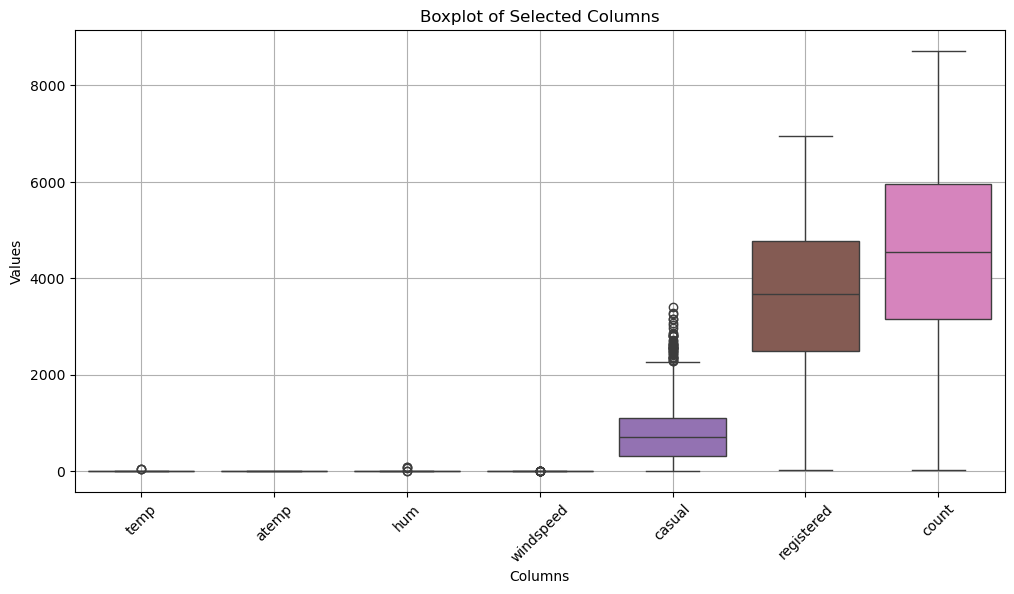

In [357]:
#identify which columns have outliers
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols])
plt.title('Boxplot of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [264]:
mean = df['atemp'].mean()
median = df['atemp'].median()
print ("'atemp'")
print(f"Mean: {mean}, Median: {median}")
print ("symmetric")

'atemp'
Mean: 0.4751979137174212, Median: 0.487996
symmetric


In [266]:
mean = df['temp'].mean()
median = df['temp'].median()
print ("'temp'")
print(f"Mean: {mean}, Median: {median}")
print ("positively skewed")

'temp'
Mean: 0.6388880211538462, Median: 0.5029889999999999
positively skewed


In [268]:
mean = df['hum'].mean()
median = df['hum'].median()
print ("'hum'")
print(f"Mean: {mean}, Median: {median}")
print ("positively skewed")

'hum'
Mean: 0.9424728372093024, Median: 0.626667
positively skewed


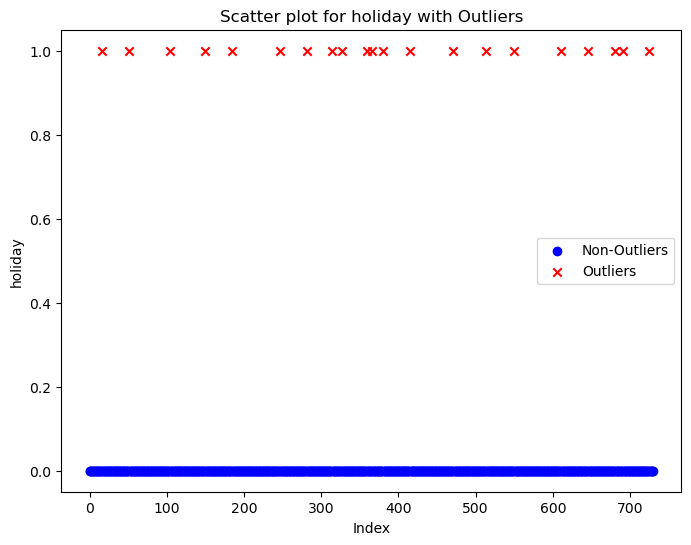

In [355]:
numeric_cols =["holiday"]

z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
z_score_threshold = 3
outlier_mask = z_scores > z_score_threshold

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index[~outlier_mask[col]], df[col][~outlier_mask[col]], marker='o', label='Non-Outliers', color='blue')
    plt.scatter(df.index[outlier_mask[col]], df[col][outlier_mask[col]], marker='x', label='Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} with Outliers')
    plt.legend()
    plt.show()


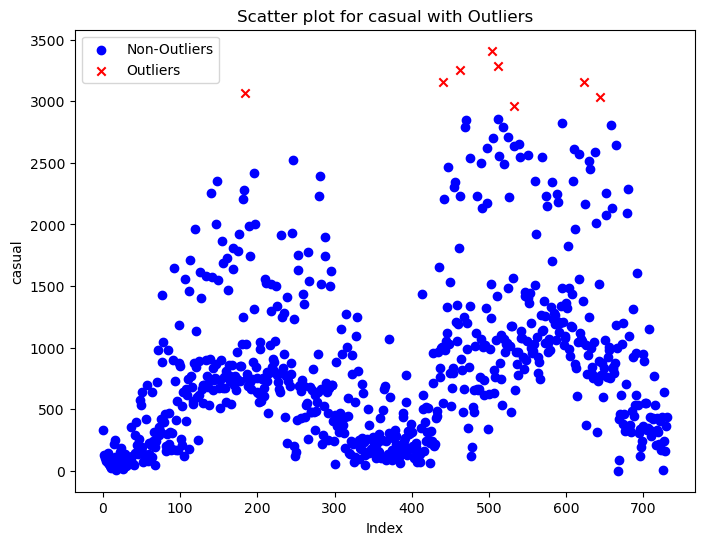

In [272]:
numeric_cols =["casual"]

z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
z_score_threshold = 3
outlier_mask = z_scores > z_score_threshold

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index[~outlier_mask[col]], df[col][~outlier_mask[col]], marker='o', label='Non-Outliers', color='blue')
    plt.scatter(df.index[outlier_mask[col]], df[col][outlier_mask[col]], marker='x', label='Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} with Outliers')
    plt.legend()
    plt.show()

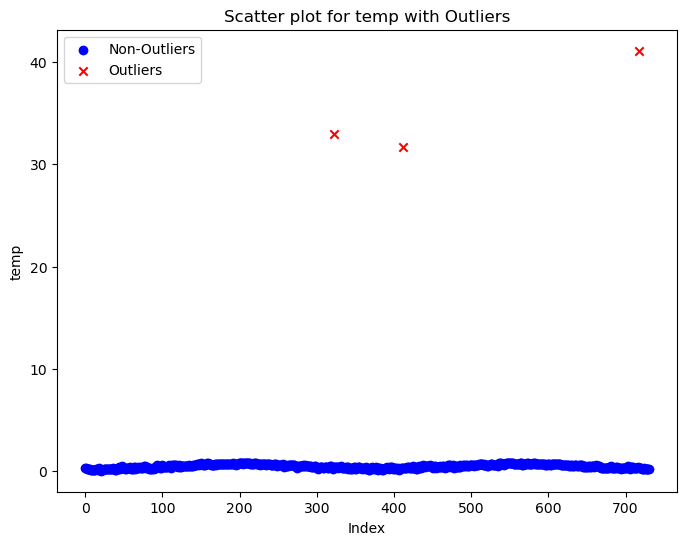

In [273]:
numeric_cols =["temp"]

z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
z_score_threshold = 3
outlier_mask = z_scores > z_score_threshold

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index[~outlier_mask[col]], df[col][~outlier_mask[col]], marker='o', label='Non-Outliers', color='blue')
    plt.scatter(df.index[outlier_mask[col]], df[col][outlier_mask[col]], marker='x', label='Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} with Outliers')
    plt.legend()
    plt.show()

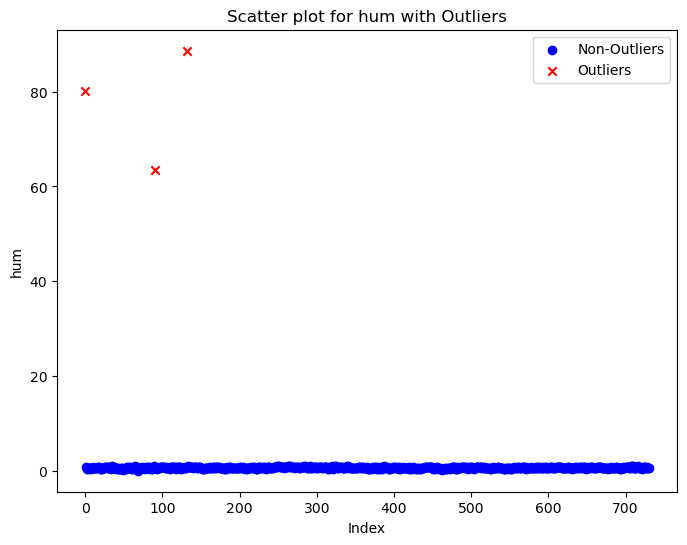

In [274]:
numeric_cols =["hum"]

z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
z_score_threshold = 3
outlier_mask = z_scores > z_score_threshold

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index[~outlier_mask[col]], df[col][~outlier_mask[col]], marker='o', label='Non-Outliers', color='blue')
    plt.scatter(df.index[outlier_mask[col]], df[col][outlier_mask[col]], marker='x', label='Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} with Outliers')
    plt.legend()
    plt.show()

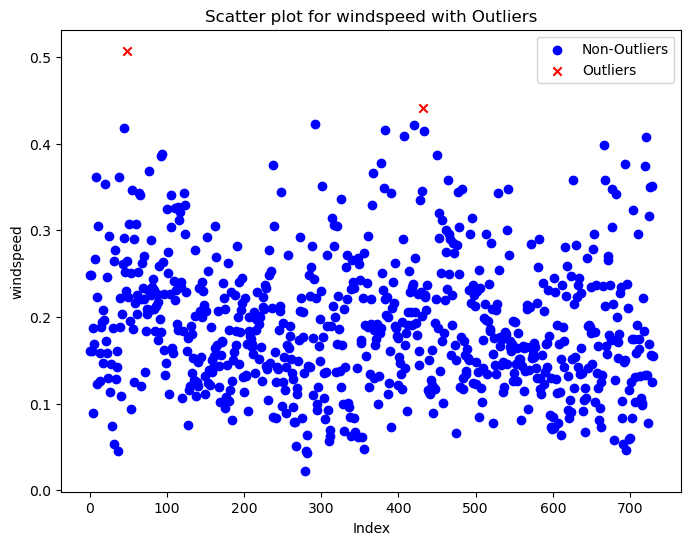

In [275]:
numeric_cols =["windspeed"]

z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
z_score_threshold = 3
outlier_mask = z_scores > z_score_threshold

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index[~outlier_mask[col]], df[col][~outlier_mask[col]], marker='o', label='Non-Outliers', color='blue')
    plt.scatter(df.index[outlier_mask[col]], df[col][outlier_mask[col]], marker='x', label='Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} with Outliers')
    plt.legend()
    plt.show()

In [278]:
#df_cleaned = df[(np.abs(zscore(df['temp'])) <= 3) & (np.abs(zscore(df['hum'])) <= 3)]
numerical_cols = ['temp', 'hum', 'windspeed']
z_scores = np.abs((df[numerical_cols] - df[numerical_cols].mean()) /
df[numerical_cols].std())
z_score_threshold = 3
outlier_mask = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)
df_cleaned = df[~outlier_mask.any(axis=1)]

print(df_cleaned.shape)

(723, 15)


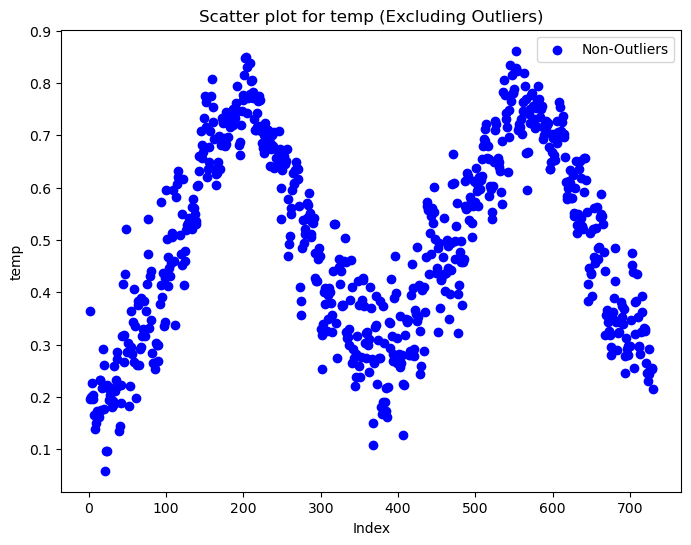

In [290]:
numeric_cols = ["temp"]

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    
    #excluding outliers
    plt.scatter(df_cleaned.index, df_cleaned[col], marker='o', label='Non-Outliers', color='blue')
    
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} (Excluding Outliers)')
    plt.legend()
    plt.show()


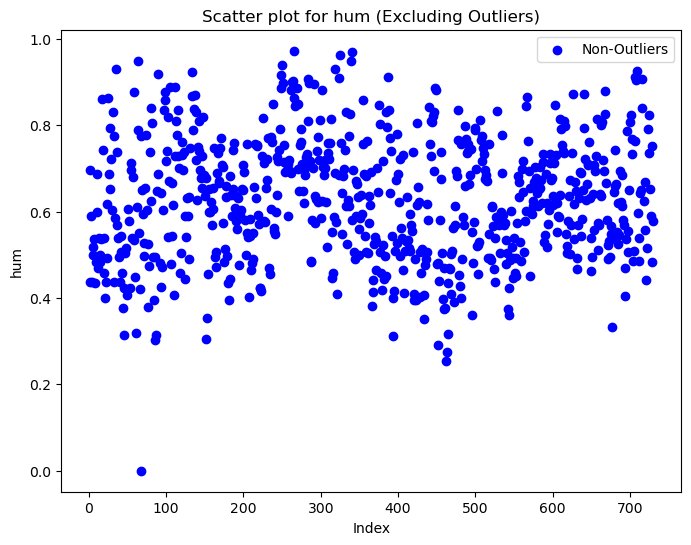

In [292]:
numeric_cols = ["hum"]

for col in numeric_cols:
    plt.figure(figsize=(8, 6))

    #excluding outliers
    plt.scatter(df_cleaned.index, df_cleaned[col], marker='o', label='Non-Outliers', color='blue')
    
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} (Excluding Outliers)')
    plt.legend()
    plt.show()


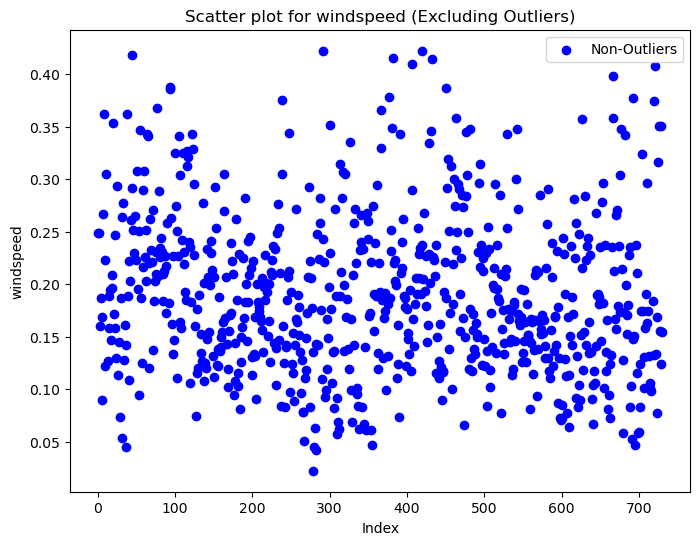

In [294]:
numeric_cols = ["windspeed"]

for col in numeric_cols:
    plt.figure(figsize=(8, 6))

    #excluding outliers
    plt.scatter(df_cleaned.index, df_cleaned[col], marker='o', label='Non-Outliers', color='blue')
    
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} (Excluding Outliers)')
    plt.legend()
    plt.show()


In [296]:
#calculate the basic summary stats
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']

mean_values = df_cleaned[numerical_columns].mean()
median_values = df_cleaned[numerical_columns].median()
std_values = df_cleaned[numerical_columns].std()

print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nStandard Deviation values:")
print(std_values)


Mean values:
temp             0.496313
atemp            0.476096
hum              0.627927
windspeed        0.189733
casual         851.491010
registered    3665.929461
count         4517.420470
dtype: float64

Median values:
temp             0.502500
atemp            0.490122
hum              0.625833
windspeed        0.180967
casual         723.000000
registered    3672.000000
count         4553.000000
dtype: float64

Standard Deviation values:
temp             0.183759
atemp            0.162808
hum              0.141670
windspeed        0.076292
casual         689.096605
registered    1557.333780
count         1936.930082
dtype: float64


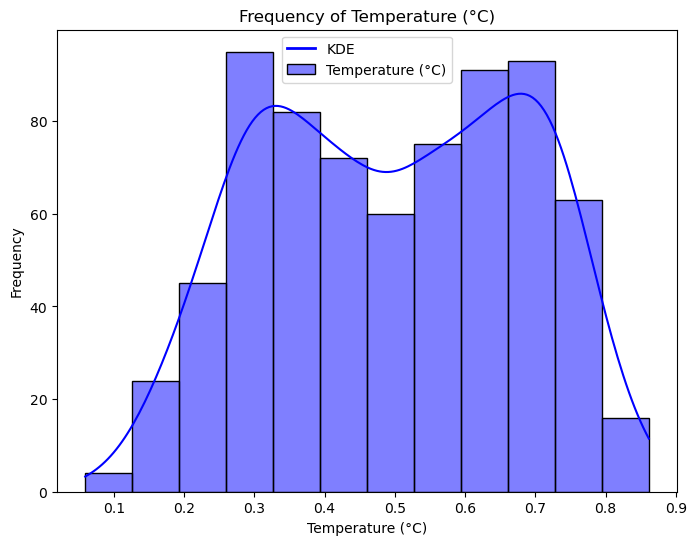

In [298]:
#histogram for temp
plt.figure(figsize=(8, 6))

sns.histplot(df_cleaned['temp'], kde=True, color='blue', label='Temperature (°C)')

plt.plot([], [], label='KDE', color='blue', linewidth=2)

plt.title('Frequency of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

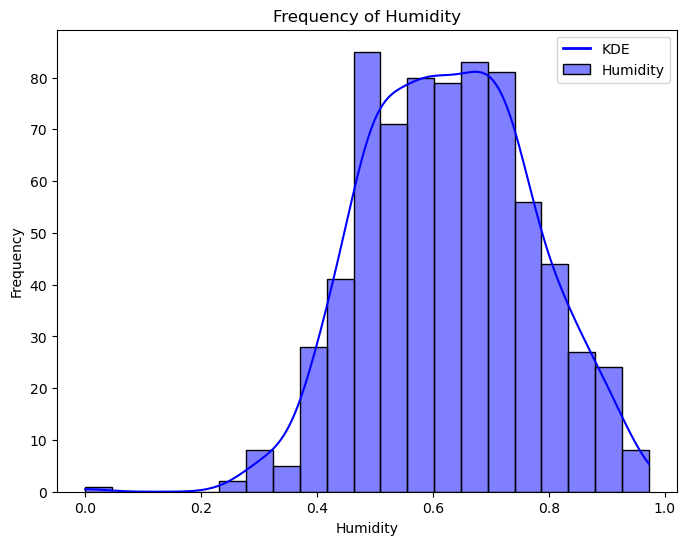

In [299]:
#histogram for hum
plt.figure(figsize=(8, 6))

sns.histplot(df_cleaned['hum'], kde=True, color='blue', label='Humidity')

plt.plot([], [], label='KDE', color='blue', linewidth=2)

plt.title('Frequency of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.legend()

plt.show()

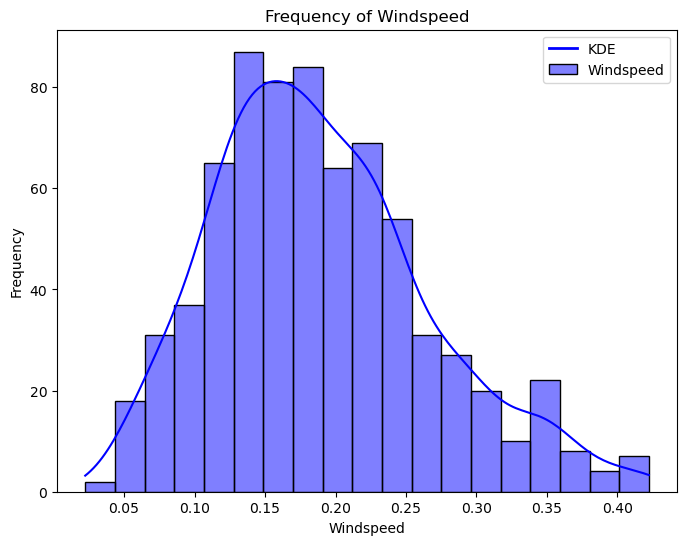

In [301]:
#histogram for windspeed
plt.figure(figsize=(8, 6))

sns.histplot(df_cleaned['windspeed'], kde=True, color='blue', edgecolor='black', label='Windspeed')

plt.plot([], [], label='KDE', color='blue', linewidth=2)

plt.title('Frequency of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.legend()

plt.show()

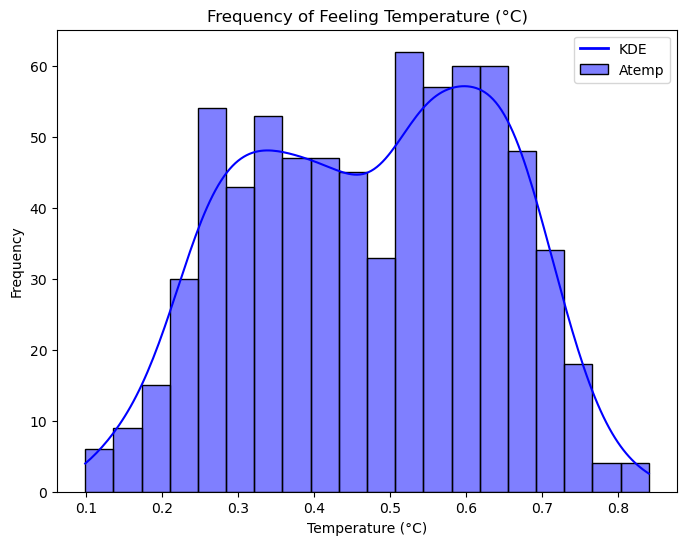

In [303]:
#histogram for atemp
plt.figure(figsize=(8, 6))

sns.histplot(df['atemp'], kde=True, color='blue', bins=20, edgecolor='black', label='Atemp')
#sns.histplot(df['atemp'], kde=True, color='blue', label='Histogram')

plt.plot([], [], label='KDE', color='blue', linewidth=2)

plt.title('Frequency of Feeling Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()

plt.show()


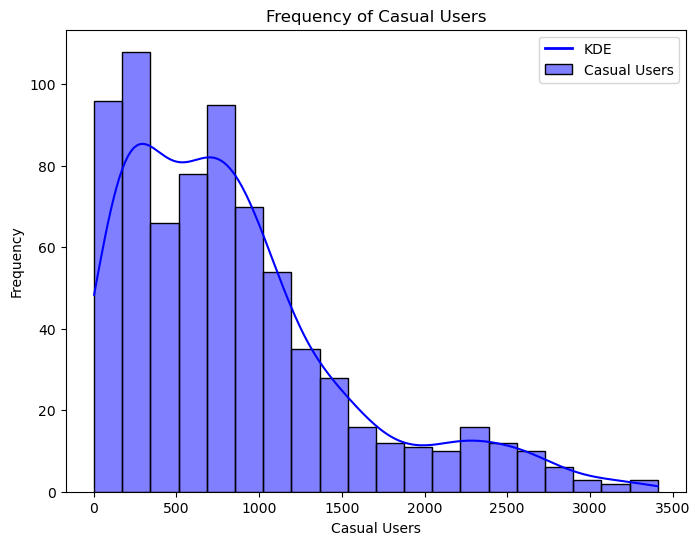

In [305]:
#histogram for casual including kde
plt.figure(figsize=(8, 6))

sns.histplot(df['casual'], kde=True, color='blue', bins=20, edgecolor='black', label='Casual Users')

plt.plot([], [], label='KDE', color='blue', linewidth=2)

plt.title('Frequency of Casual Users')
plt.xlabel('Casual Users')
plt.ylabel('Frequency')

plt.legend()

plt.show()


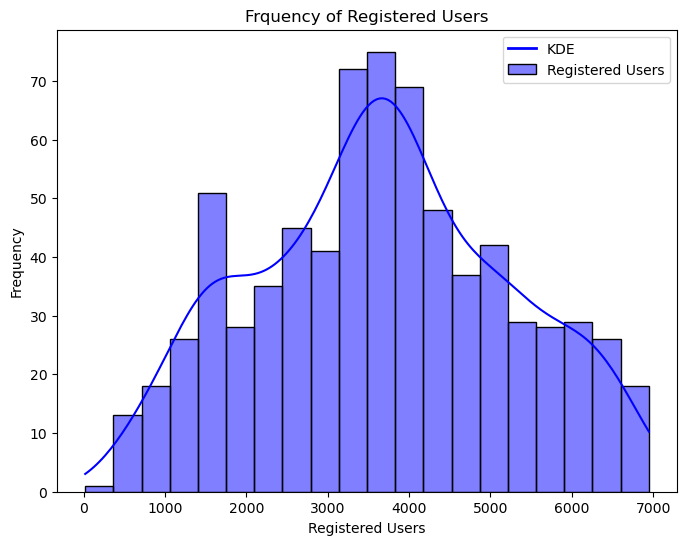

In [306]:
#histogram for registered including kde
plt.figure(figsize=(8, 6))

sns.histplot(df['registered'], kde=True, color='blue', bins=20, edgecolor='black', label='Registered Users')

plt.plot([], [], label='KDE', color='blue', linewidth=2)

plt.title('Frquency of Registered Users')
plt.xlabel('Registered Users')
plt.ylabel('Frequency')

plt.legend()

plt.show()


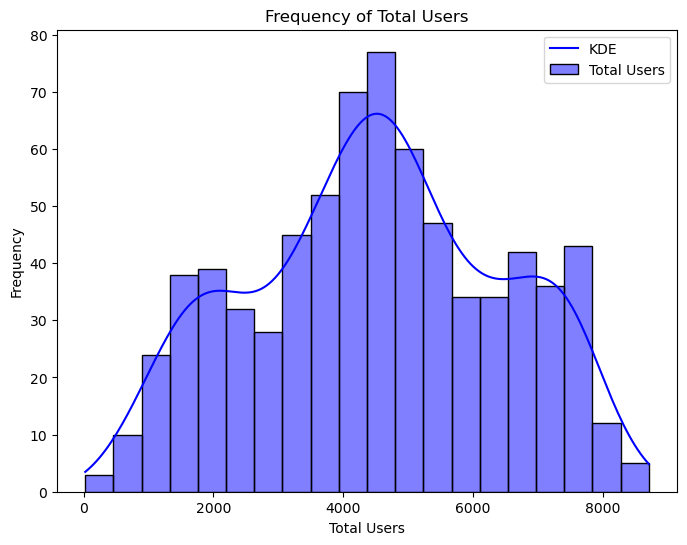

In [308]:
#histogram for total including kde
plt.figure(figsize=(8, 6))

sns.histplot(df['count'], kde=True, color='blue', bins=20, edgecolor='black', label='Total Users')

plt.plot([], [], label='KDE', color='blue')

plt.title('Frequency of Total Users')
plt.xlabel('Total Users')
plt.ylabel('Frequency')

plt.legend()

plt.show()


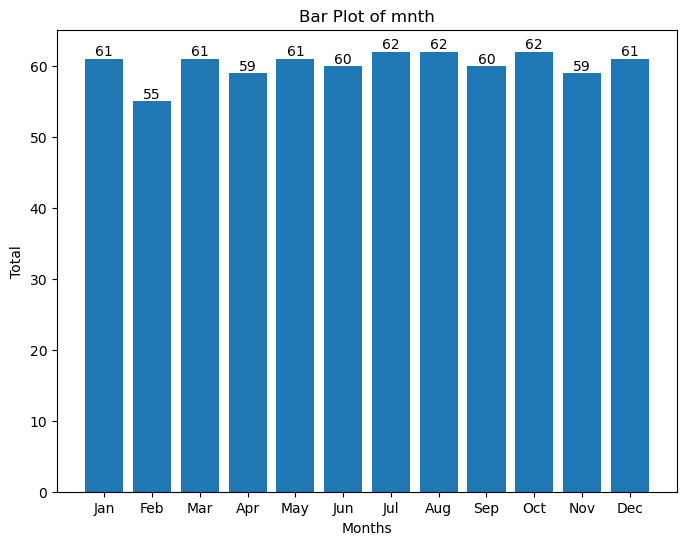

In [309]:
#bar plot for mnth
height = df_cleaned['mnth'].value_counts().sort_index()
bars = height.index
custom_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(8, 6))
plt.bar(bars, height)

plt.title('Bar Plot of mnth')
plt.xlabel('Months')
plt.ylabel('Total')
plt.xticks(ticks=bars, labels=custom_labels)
for bar in bars:
    plt.text(bar, height[bar], str(height[bar]), ha='center', va='bottom')

plt.show()

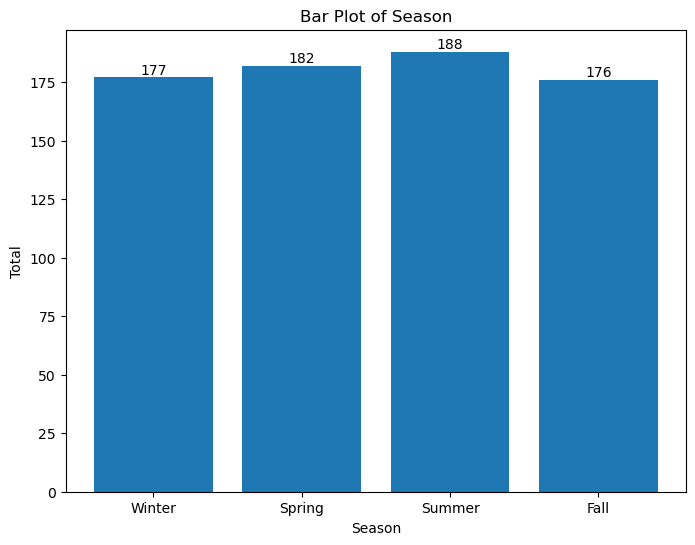

In [311]:
#bar plot for season
height = df_cleaned['season'].value_counts().sort_index()
bars = height.index
custom_labels = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(8, 6))
plt.bar(bars, height)

plt.title('Bar Plot of Season')
plt.xlabel('Season')
plt.ylabel('Total')
plt.xticks(ticks=bars, labels=custom_labels)
for bar in bars:
    plt.text(bar, height[bar], str(height[bar]), ha='center', va='bottom')

plt.show()


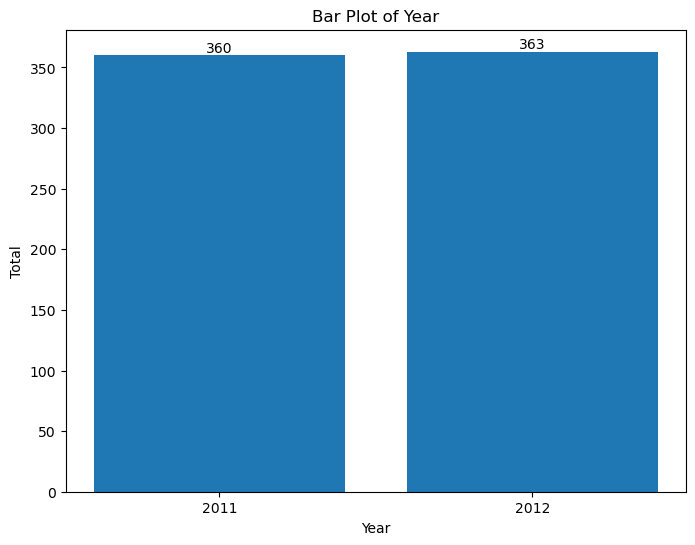

In [314]:
height = df_cleaned['yr'].value_counts().sort_index()
bars = height.index
custom_labels = ['2011', '2012']

plt.figure(figsize=(8, 6))
plt.bar(bars, height)

plt.title('Bar Plot of Year')
plt.xlabel('Year')
plt.ylabel('Total')
plt.xticks(ticks=bars, labels=custom_labels)
for bar in bars:
    plt.text(bar, height[bar], str(height[bar]), ha='center', va='bottom')

plt.show()

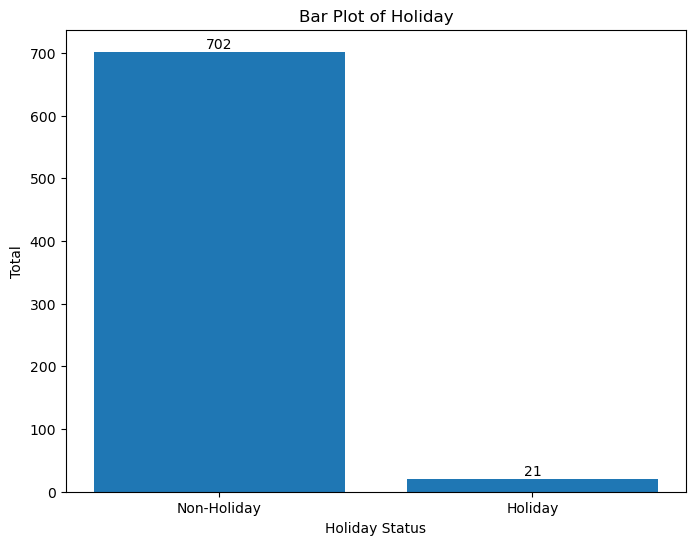

In [316]:
height = df_cleaned['holiday'].value_counts().sort_index()
bars = height.index
custom_labels = ['Non-Holiday', 'Holiday']

plt.figure(figsize=(8, 6))
plt.bar(bars, height)

plt.title('Bar Plot of Holiday')
plt.xlabel('Holiday Status')
plt.ylabel('Total')
plt.xticks(ticks=bars, labels=custom_labels)
for bar in bars:
    plt.text(bar, height[bar], str(height[bar]), ha='center', va='bottom')

plt.show()

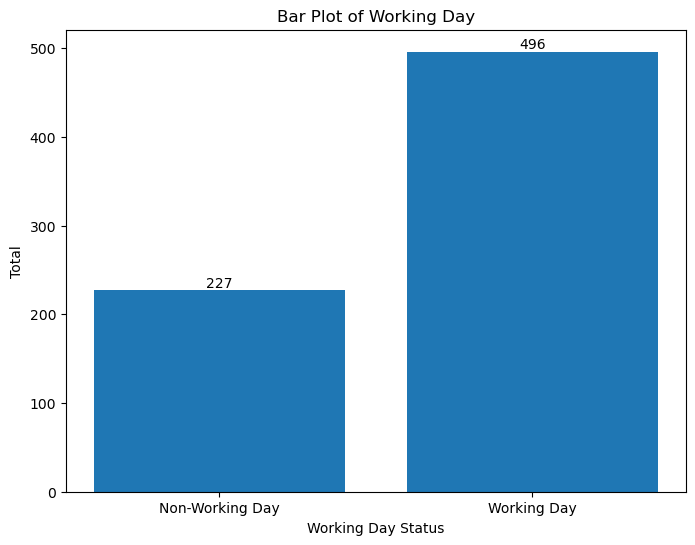

In [319]:
height = df_cleaned['workingday'].value_counts().sort_index()
bars = height.index
custom_labels = ['Non-Working Day', 'Working Day']

plt.figure(figsize=(8, 6))
plt.bar(bars, height)

plt.title('Bar Plot of Working Day')
plt.xlabel('Working Day Status')
plt.ylabel('Total')
plt.xticks(ticks=bars, labels=custom_labels)
for bar in bars:
    plt.text(bar, height[bar], str(height[bar]), ha='center', va='bottom')

plt.show()

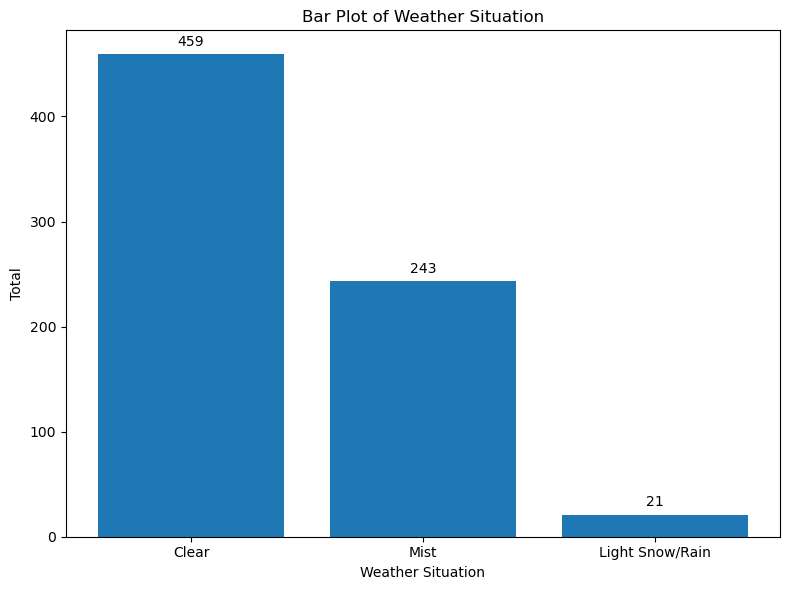

In [322]:
height = df_cleaned['weathersit'].value_counts().sort_index()
bars = height.index
custom_labels = ['Clear', 'Mist', 'Light Snow/Rain']

plt.figure(figsize=(8, 6))
plt.bar(bars, height)

plt.title('Bar Plot of Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total')
plt.xticks(ticks=bars, labels=custom_labels)

for bar in bars:
    plt.text(bar, height[bar] + 5, str(height[bar]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [327]:
#calculating the correlations between numerical features
numerical_df = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

              season        yr      mnth   holiday   weekday  workingday  \
season      1.000000 -0.003130  0.828921 -0.011479  0.004082    0.010686   
yr         -0.003130  1.000000 -0.004668  0.007518  0.003507   -0.012094   
mnth        0.828921 -0.004668  1.000000  0.018508  0.017921   -0.009685   
holiday    -0.011479  0.007518  0.018508  1.000000 -0.100942   -0.255664   
weekday     0.004082  0.003507  0.017921 -0.100942  1.000000    0.047192   
workingday  0.010686 -0.012094 -0.009685 -0.255664  0.047192    1.000000   
weathersit  0.025004 -0.046155  0.050955 -0.034433  0.027550    0.062797   
temp        0.336249  0.046546  0.220547 -0.029545  0.005537    0.046517   
atemp       0.340629  0.038712  0.221872 -0.034624  0.003920    0.043814   
hum         0.209016 -0.114720  0.226840 -0.016154 -0.050317    0.017307   
windspeed  -0.226407 -0.008878 -0.206095  0.008148  0.004968   -0.013243   
casual      0.207866  0.251797  0.119968  0.053555  0.063657   -0.522536   
registered  

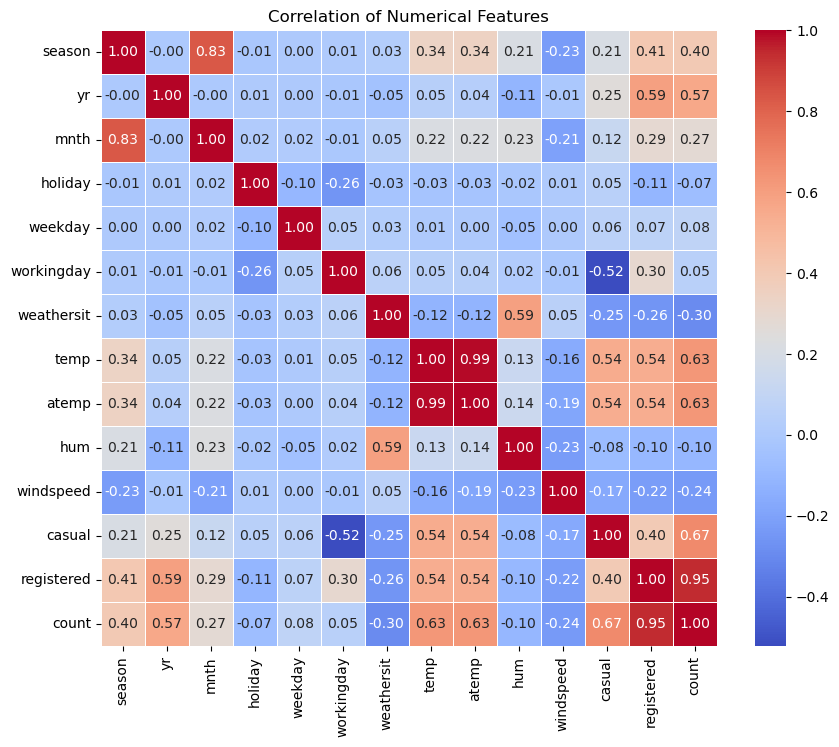

In [333]:
#visualise correlation between numerical
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation of Numerical Features')
plt.show()


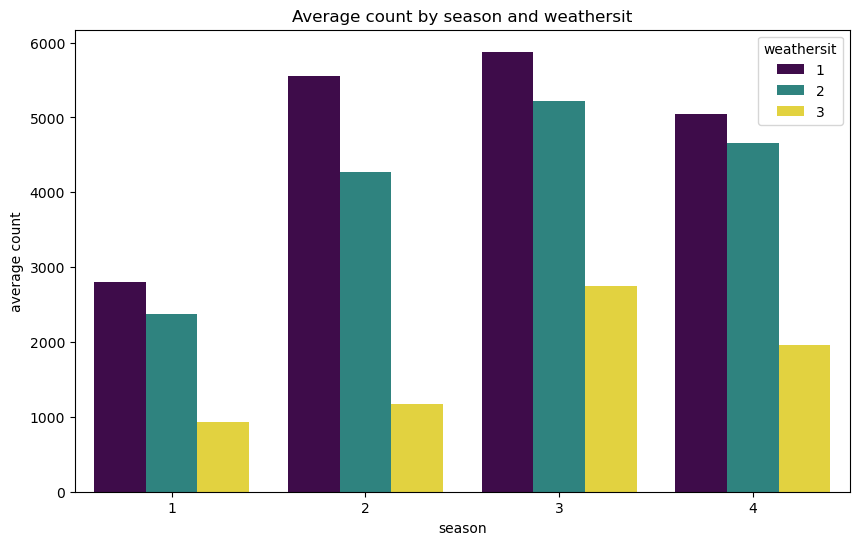

In [343]:
#visualises relationship between count season and weathersit
grouped_data = df_cleaned.groupby(['season', 'weathersit'])['count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', hue='weathersit', data=grouped_data, palette='viridis')

plt.title('Average count by season and weathersit')
plt.xlabel('season')
plt.ylabel('average count')
plt.legend(title='weathersit')

plt.show()


   weathersit         mean  median
0           1  4883.910675  4844.0
1           2  4059.716049  4046.0
2           3  1803.285714  1817.0


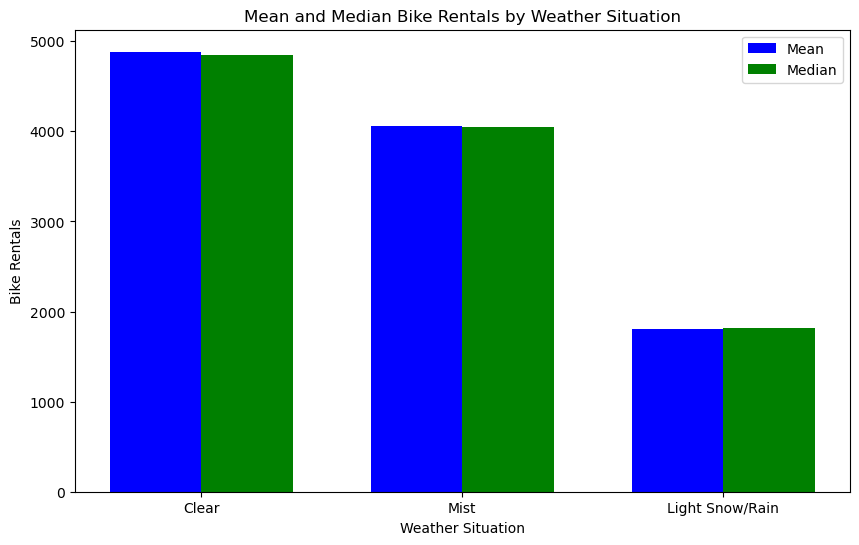

In [347]:
#mean and median bike rentals by weather situation
agg_data = df_cleaned.groupby('weathersit')['count'].agg(['mean', 'median']).reset_index()
print(agg_data)

bar_width = 0.35
index = agg_data['weathersit']
mean_values = agg_data['mean']
median_values = agg_data['median']

plt.figure(figsize=(10, 6))
plt.bar(index, mean_values, bar_width, label='Mean', color='blue')
plt.bar(index + bar_width, median_values, bar_width, label='Median', color='green')
plt.xlabel('Weather Situation')
plt.ylabel('Bike Rentals')
plt.title('Mean and Median Bike Rentals by Weather Situation')
plt.xticks(index + bar_width / 2, ['Clear', 'Mist', 'Light Snow/Rain'])
plt.legend()

plt.show()


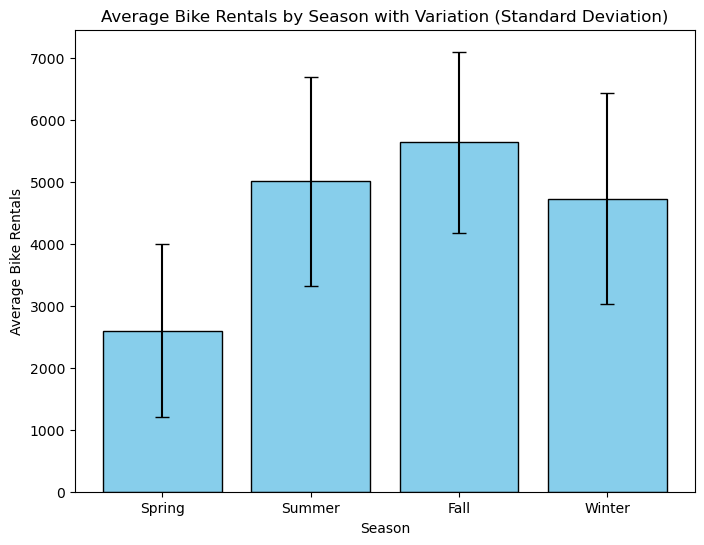

In [349]:
#perform analysis to show how different season affects the count
season_stats = df_cleaned.groupby('season')['count'].agg(['mean', 'std']).reset_index()

season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
season_stats['season'] = season_labels

plt.figure(figsize=(8, 6))
plt.bar(season_stats['season'], season_stats['mean'], yerr=season_stats['std'], capsize=5, color='skyblue', edgecolor='black')

plt.title('Average Bike Rentals by Season with Variation (Standard Deviation)')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals')
plt.show()